# SIGMOID NEURON

## Hi everyone and welcome to the first Deep learning tutorial and let's start of with the basic building block of deep learning which is the sigmoid neuron or the logistic regression

## Let us go step by step through the process

# Prerequisites


Before getting into this i would like you to have some basic fundamentals of python and machine learning. I have uploaded python basics and ML basics on my Github repo and you can refer through it

# What is a sigmoid neuron 


Sigmoid neuron is nothing but a logistic regression. The below is the equation of an SN:

$$ y=  \frac{\mathrm{1} }{\mathrm{1} + e^-(wx+b) }  $$ 

Here, w is the weight and b is the bias we learn from the data. The output of SN always converges between 0 and 1. It can be interpreted as a probability. There is no harsh boundary between two classes, you’ll get it when you see the below diagram:

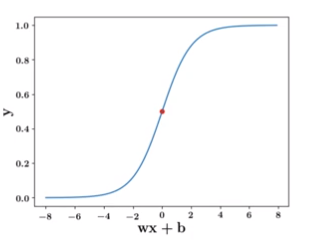

In [47]:
from IPython.display import Image
Image(filename='/home/nbuser/image.png')

The motivation behind learning sigmoid neuron is to find the probability of an observation belonging to a particular class. Since the output is always between 0 and 1, we’ll set a threshold and categorize data based on the threshold. We start with 0.5 threshold by default, but it may not hold true for all cases. Ok, let’s do some coding.

# Generating our own linear separable data

## What are linear separable and not a linear separable data?


If we can draw straight lines to separate classes of data, then it is linear, else non-linear.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tqdm import tqdm_notebook

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
data, labels = make_blobs(n_samples=1000, n_features=2, random_state=0, centers=2)
print(data.shape, labels.shape)

(1000, 2) (1000,)


I’ve generated linearly separable data with the built-in dataset generator make_blobs. The data contains 2 features, 2 classes 1000 observations. Let’s visualize the data to confirm if it’s linearly separable

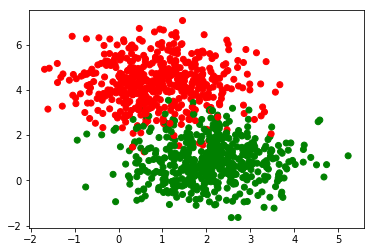

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

### Now, let’s split the data into train &amp; test to evaluate model’s generalization.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


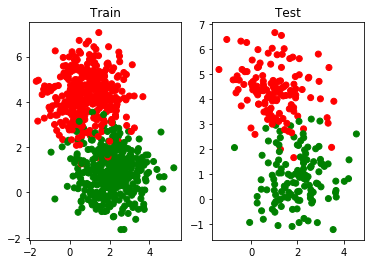

In [5]:
#subplot both train and test data
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_train[:,0],X_train[:,1], c=Y_train, cmap=my_cmap)
ax1.set_title('Train')
ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=my_cmap)
ax2.set_title('Test')
plt.show()

Next step is to standardize the data. Let’s standardize the data to 0 mean and unit variance for all the features. We usually standardize the input to scale all the features similarly, so that during modelling, we don’t need to take a micro step in one dimension and a huge leap in the other. It also makes computation easy.

In [6]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
print(np.std(X_train_scaled))

1.0


## Fitting SN to a linear separable data

Now that we have set up all the things to learn from the data, it’s time to create our class for sigmoid neuron for modelling.

In [7]:
class SigmoidNeuron():
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, x):
    return(np.dot(self.w, x) + self.b)
  
  def sigmoid(self, x):
    return(1.0 / (1.0 + np.exp(-x)))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y) * y_pred * (1-y_pred) * x)
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y) * y_pred * (1-y_pred))
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y)*x)
  
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return(y_pred - y)
  
  def fit(self, X, Y, epochs=100, lr=1e-2, initialize=True, display_loss=True, loss_fn='mse'):
    if(initialize):
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    min_loss = 100
    if(display_loss):
      loss = {}
    
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      dw, db = 0, 0
      for x,y in zip(X,Y):
        if(loss_fn=='ce'):
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
        
        elif(loss_fn=='mse'):
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y)
        
      Y_pred = self.predict(X)
      m = X.shape[0]
      
      self.w -= lr * (dw/m)
      self.b -= lr * (db/m)
      
      if(loss_fn == 'mse'):
        loss[epoch] = mean_squared_error(Y, Y_pred)
        
      if(loss_fn=='ce'):
        loss[epoch] = log_loss(Y, Y_pred)
      
      if(loss[epoch] < min_loss):
        min_loss = loss[epoch]
        chkpt_w = self.w
        chkpt_b = self.b
    
    if(display_loss):
      plt.plot(loss.values())
    
    self.w = chkpt_w
    self.b = chkpt_b
    print('Min loss: %0.3f'%(min_loss))
    #print('Accuracy score: %0.3f'%(accuracy_score(Y, self.predict(X))))
    return(self.w, self.b)
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.sigmoid(self.perceptron(x)))
    return(np.array(Y_pred))

Let’s sneakpeek into the above class and see what each method does. First, we’ll define the constructor(__init__) for the class and set the parameters to ‘None’.

‘perceptron()’ method does the dot product of the input and the parameters and then adds bias to it. ‘sigmoid()’ method applies sigmoid to the passed input.

Some of the important methods to notice are: grad_w_mse(), grad_b_mse(), grad_w_ce() and grad_b_ce(). I have to update parameters(w,b) in a principled manner such that, the loss function which I try to minimize should be lesser in the next step. I manually derived loss w.r. to both ‘w’ and ‘b’. ‘mse’ represents mean_squared_error and ‘ce’ represents ‘cross entropy’. Derivations are with respect to their equations.

Now, let’s explore fit() method which actually learns the relationship between input and output(which we call model).

Following are the things to be noticed in modelling:

For every data point, we compute output, derive loss w.r. to ‘w’ and ‘b’ and keep aggregating the gradients.
Ideally, the above operation is called single-batch gradient descent.
We update parameters after seeing all observtions. i.e after one epoch.
Divided the accumulated gradients by ‘m’ (no. of observations) to average the gradients thereby not making it grow enormously.
Whenever minimum loss is encountered, we checkpoint it and return the best parameters after going through all epochs.
I’ve wrapped for loop inside tqdm_notebook function just to show the progress during training. PFB screenshot of the progress bar during training. It helps us estimate the time taken to complete the training process. You can quickly grab a coffee while enjoying the progress because it takes a lot time

In [8]:
sn = SigmoidNeuron()


Min loss: 0.068


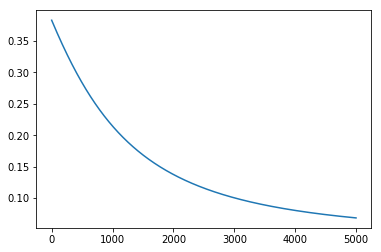

In [23]:
best_w, best_b = sn.fit(X_train_scaled, Y_train, epochs=5000)

Once training is complete, we’ll have to evaluate the model. Please look at the below function to evaluate the model

In [26]:
def evaluate(X_train_scaled, X_test_scaled, Y_train, Y_test):
  Y_train_pred = sn.predict(X_train_scaled)
  Y_train_pred_binarized = np.array(Y_train_pred > 0.5).astype('int').ravel()
  Y_test_pred = sn.predict(X_test_scaled)
  Y_test_pred_binarized = np.array(Y_test_pred > 0.5).astype('int').ravel()
  print('Accuracy score train: %0.3f' %(accuracy_score(Y_train, Y_train_pred_binarized)))
  print('Accuracy score test: %0.3f' %(accuracy_score(Y_test, Y_test_pred_binarized)))
  return(Y_test_pred_binarized)


In [27]:
Y_test_pred_binarized = evaluate(X_train_scaled, X_test_scaled, Y_train, Y_test)

Accuracy score train: 0.927
Accuracy score test: 0.900


Note that, I’ve set the threshold as 0.5 to classify the observations. Not necessarily, it should be 0.5 for all the case.

Let’s visualize what our model has learnt.

Text(0.5, 1.0, 'Test data predictions')

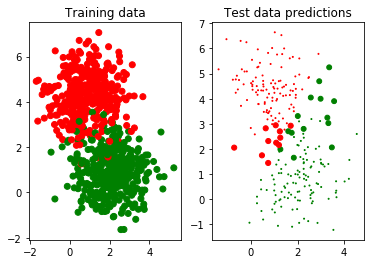

In [28]:
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap)
ax1.set_title('Training data')

ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c=Y_test_pred_binarized, cmap=my_cmap, s=np.abs(25*(Y_test - Y_test_pred_binarized)+1))
ax2.set_title('Test data predictions')

I plotted training data graph just for reference. Let’s focus on test data predictions plot alone. The following things are to be noticed in the plot:

There are four dimensions in the plot: x &amp; y axes are two dimensions, color of the predicted class being third dimension and size of the point being fourth dimension.

As can be noticed from the code, the size argument (s) in the scatter plot holds the absolute difference between the predicted and actual output. So the size grows with incorrect predictions.

As our accuracy is around 95%, it’s evident in the graph that only few points are bigger in size(incorrect).

We’ve seen how sigmoid neuron performs for a linear separable data. It performs quite well right. Now let’s see how it performs for a non-linear data.

## Generate non-linear data

In [29]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


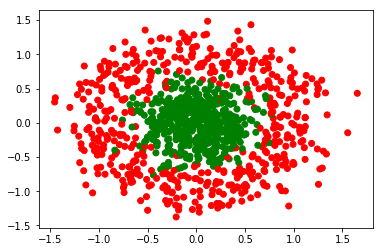

In [30]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

The above data is non-linear as we cannot draw a sraight line to separate the classes. Let’s scale the data as always.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## What if we try to fit an SN to a non-linear data?

Let’s fit the sigmoid neuron to this non-linear data and evaluate its performance.


Min loss: 0.262


(array([[0.47110566, 0.14235589]]), array([0.05676329]))

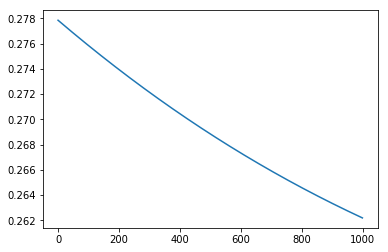

In [32]:
sn = SigmoidNeuron()
sn.fit(X_train_scaled, Y_train, epochs=1000)

In [33]:
Y_test_pred_binarized = evaluate(X_train_scaled, X_test_scaled, Y_train, Y_test)

Accuracy score train: 0.541
Accuracy score test: 0.552


We see that the accuracy drops drastically if we fit the same model on a non-linear data. This is because a single sigmoid neuron cannot model the non-linear relationship between input and output. After all, the equation we learn in sigmoid neuron is just a sigmoid function applied over a linear perceptron equation. Let’s visualize the results

Text(0.5, 1.0, 'Test data predictions')

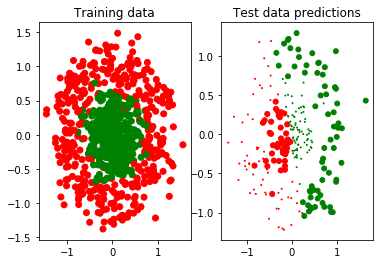

In [34]:
ax1 = plt.subplot(1,2,1)
ax1.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap)
ax1.set_title('Training data')

ax2 = plt.subplot(1,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c=Y_test_pred_binarized, cmap=my_cmap, s=np.abs(25*(Y_test - Y_test_pred_binarized)+1))
ax2.set_title('Test data predictions')

As always, let’s focus on the test data predictions. It can be seen above, the data is still separated by a line(not shown in the graph above) which is why it cannot model the actual relationship.

## Summary and what next


We’ve learnt how to model linear data using a sigmoid neuron/logistic regression. However it cannot be used for non-linear data. In the example data we take, we had only two features, we directly plotted it to check if it’s linear or not. But how to check the real world data? We cannot plot it as the dimensions will be more.

Rather we can try to model the real world data with a single sigmoid neuron as a very basic step in our project, if the accuracy metric doesn’t hold good, we infer that the data is non-linear and we’ll have to build a model that captures non-linearity.

In next topic of my post let us look how we can deal with non linearity in data


# Thanks and regards
### Vimal